<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap17/17_3_Importance_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 17.3: Importance sampling**

This notebook investigates importance sampling as described in section 17.8.1 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Let's approximate the expectation

\begin{equation}
\mathbb{E}_{y}\Bigl[\exp\bigl[- (y-1)^4\bigr]\Bigr] = \int \exp\bigl[- (y-1)^4\bigr] Pr(y) dy,
\end{equation}

where

\begin{equation}
Pr(y)=\text{Norm}_y[0,1]
\end{equation}

by drawing $I$ samples $y_i$ and using the formula:

\begin{equation}
\mathbb{E}_{y}\Bigl[\exp\bigl[- (y-1)^4\bigr]\Bigr] \approx \frac{1}{I} \sum_{i=1}^I \exp\bigl[-(y_i-1)^4 \bigr]
\end{equation}

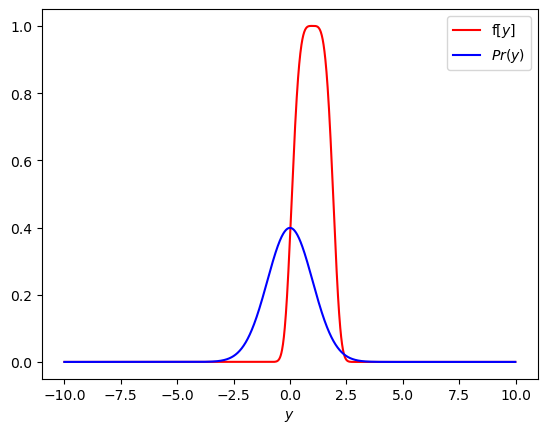

In [3]:
def f(y):
  return np.exp(-(y-1) *(y-1) *(y-1) * (y-1))


def pr_y(y):
  return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * y * y)

fig,ax = plt.subplots()
y = np.arange(-10,10,0.01)
ax.plot(y, f(y), 'r-', label='f$[y]$');
ax.plot(y, pr_y(y),'b-',label='$Pr(y)$')
ax.set_xlabel("$y$")
ax.legend()
plt.show()

In [4]:
def compute_expectation(n_samples):
  # TODO -- compute this expectation
  # 1. Generate samples y_i using np.random.normal
  y_samples = np.random.normal(0, 1, n_samples)
  # 2. Approximate the expectation of f[y]
  f_values = f(y_samples)
  # Replace this line
  expectation = np.mean(f_values)


  return expectation

In [5]:
# Set the seed so the random numbers are all the same
np.random.seed(0)

# Compute the expectation  with a very large number of samples (good estimate)
n_samples = 100000000
expected_f= compute_expectation(n_samples)
print("Your value: ", expected_f, ", True value:  0.43160702267383166")

Your value:  0.43160702267383166 , True value:  0.43160702267383166


Let's investigate how the variance of this approximation decreases as we increase the number of samples $N$.




In [6]:
def compute_mean_variance(n_sample):
  n_estimate = 10000
  estimates = np.zeros((n_estimate,1))
  for i in range(n_estimate):
    estimates[i] = compute_expectation(n_sample.astype(int))
  return np.mean(estimates), np.var(estimates)

In [7]:
# Compute the mean and variance for 1,2,... 20 samples
n_sample_all = np.array([1.,2,3,4,5,6,7,8,9,10,15,20,25,30,45,50,60,70,80,90,100,150,200,250,300,350,400,450,500])
mean_all = np.zeros_like(n_sample_all)
variance_all = np.zeros_like(n_sample_all)
for i in range(len(n_sample_all)):
  print("Computing mean and variance for expectation with %d samples"%(n_sample_all[i]))
  mean_all[i],variance_all[i] = compute_mean_variance(n_sample_all[i])

Computing mean and variance for expectation with 1 samples
Computing mean and variance for expectation with 2 samples
Computing mean and variance for expectation with 3 samples
Computing mean and variance for expectation with 4 samples
Computing mean and variance for expectation with 5 samples
Computing mean and variance for expectation with 6 samples
Computing mean and variance for expectation with 7 samples
Computing mean and variance for expectation with 8 samples
Computing mean and variance for expectation with 9 samples
Computing mean and variance for expectation with 10 samples
Computing mean and variance for expectation with 15 samples
Computing mean and variance for expectation with 20 samples
Computing mean and variance for expectation with 25 samples
Computing mean and variance for expectation with 30 samples
Computing mean and variance for expectation with 45 samples
Computing mean and variance for expectation with 50 samples
Computing mean and variance for expectation with 

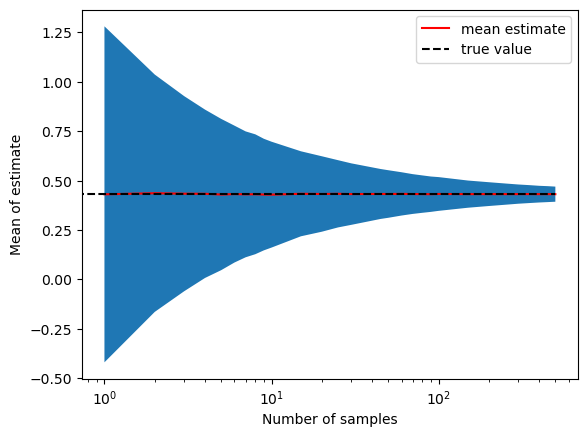

In [8]:
fig,ax = plt.subplots()
ax.semilogx(n_sample_all, mean_all,'r-',label='mean estimate')
ax.fill_between(n_sample_all, mean_all-2*np.sqrt(variance_all), mean_all+2*np.sqrt(variance_all))
ax.set_xlabel("Number of samples")
ax.set_ylabel("Mean of estimate")
ax.plot([0,500],[0.43160702267383166,0.43160702267383166],'k--',label='true value')
ax.legend()
plt.show()


As you might expect, the more samples that we use to compute the approximate estimate, the lower the variance of the estimate.

 Now consider the function
 \begin{equation}
 \mbox{f}[y]= 20.446\exp\left[-(y-3)^4\right],
 \end{equation}

which decreases rapidly as we move away from the position $y=3$.

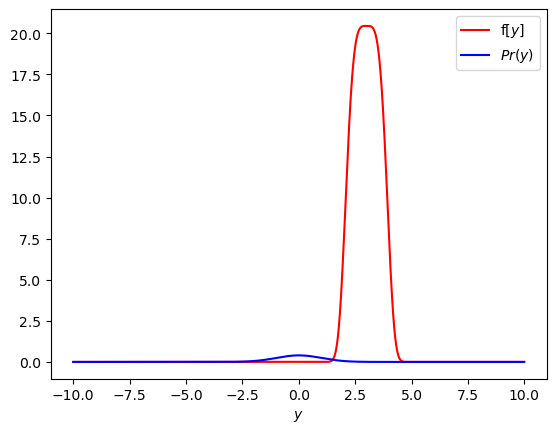

In [9]:
def f2(y):
  return 20.446*np.exp(- (y-3) *(y-3) *(y-3) * (y-3))

fig,ax = plt.subplots()
y = np.arange(-10,10,0.01)
ax.plot(y, f2(y), 'r-', label='f$[y]$');
ax.plot(y, pr_y(y),'b-',label='$Pr(y)$')
ax.set_xlabel("$y$")
ax.legend()
plt.show()

Let's again, compute the expectation:

\begin{align}
\mathbb{E}_{y}\left[\text{f}[y]\right] &=& \int \text{f}[y] Pr(y) dy\\
&\approx& \frac{1}{I} \text{f}[y]
\end{align}

where $Pr(y)=\text{Norm}_y[0,1]$ by approximating with samples $y_{i}$.


In [10]:
def compute_expectation2(n_samples):
  y = np.random.normal(size=(n_samples,1))
  expectation = np.mean(f2(y))

  return expectation

In [11]:
# Set the seed so the random numbers are all the same
np.random.seed(0)

# Compute the expectation with a very large number of samples (good estimate)
n_samples = 100000000
expected_f2= compute_expectation2(n_samples)
print("Expected value: ", expected_f2)

Expected value:  0.43160428638892556


I deliberately chose this function, because it's expectation is roughly the same as for the previous function.

Again, let's look at the mean and the  variance of the estimates

In [12]:
def compute_mean_variance2(n_sample):
  n_estimate = 10000
  estimates = np.zeros((n_estimate,1))
  for i in range(n_estimate):
    estimates[i] = compute_expectation2(n_sample.astype(int))
  return np.mean(estimates), np.var(estimates)

# Compute the variance for 1,2,... 20 samples
mean_all2 = np.zeros_like(n_sample_all)
variance_all2 = np.zeros_like(n_sample_all)
for i in range(len(n_sample_all)):
  print("Computing variance for expectation with %d samples"%(n_sample_all[i]))
  mean_all2[i], variance_all2[i] = compute_mean_variance2(n_sample_all[i])

Computing variance for expectation with 1 samples
Computing variance for expectation with 2 samples
Computing variance for expectation with 3 samples
Computing variance for expectation with 4 samples
Computing variance for expectation with 5 samples
Computing variance for expectation with 6 samples
Computing variance for expectation with 7 samples
Computing variance for expectation with 8 samples
Computing variance for expectation with 9 samples
Computing variance for expectation with 10 samples
Computing variance for expectation with 15 samples
Computing variance for expectation with 20 samples
Computing variance for expectation with 25 samples
Computing variance for expectation with 30 samples
Computing variance for expectation with 45 samples
Computing variance for expectation with 50 samples
Computing variance for expectation with 60 samples
Computing variance for expectation with 70 samples
Computing variance for expectation with 80 samples
Computing variance for expectation with 

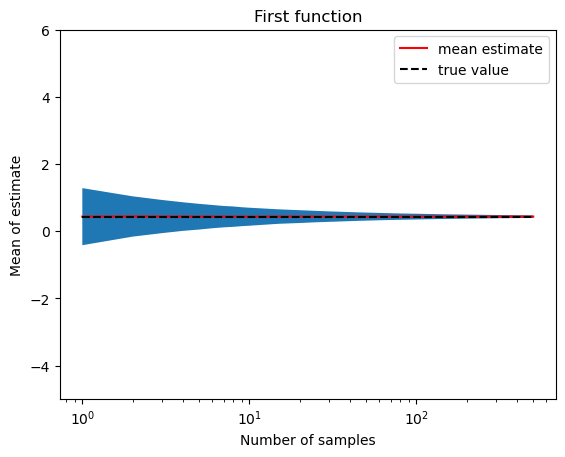

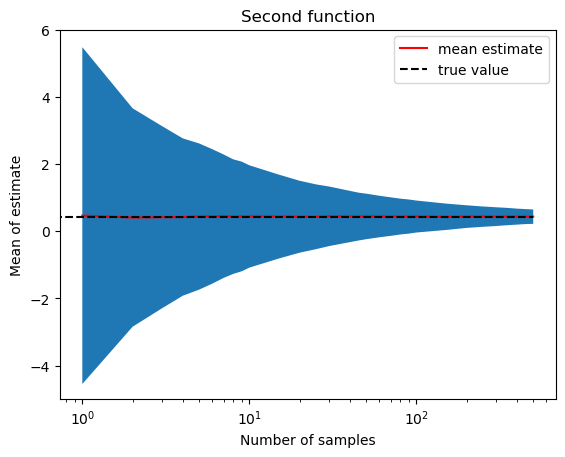

In [13]:
fig,ax1 = plt.subplots()
ax1.semilogx(n_sample_all, mean_all,'r-',label='mean estimate')
ax1.fill_between(n_sample_all, mean_all-2*np.sqrt(variance_all), mean_all+2*np.sqrt(variance_all))
ax1.set_xlabel("Number of samples")
ax1.set_ylabel("Mean of estimate")
ax1.plot([1,500],[0.43160702267383166,0.43160702267383166],'k--',label='true value')
ax1.set_ylim(-5,6)
ax1.set_title("First function")
ax1.legend()

fig2,ax2 = plt.subplots()
ax2.semilogx(n_sample_all, mean_all2,'r-',label='mean estimate')
ax2.fill_between(n_sample_all, mean_all2-2*np.sqrt(variance_all2), mean_all2+2*np.sqrt(variance_all2))
ax2.set_xlabel("Number of samples")
ax2.set_ylabel("Mean of estimate")
ax2.plot([0,500],[0.43160428638892556,0.43160428638892556],'k--',label='true value')
ax2.set_ylim(-5,6)
ax2.set_title("Second function")
ax2.legend()
plt.show()

You can see that the variance of the estimate of the second function is considerably worse than the estimate of the variance of estimate of the first function

TODO:  Think about why this is.

 Now let's repeat this experiment with the second function, but this time use importance sampling with auxiliary distribution:

 \begin{equation}
   q(y)=\text{Norm}_{y}[3,1]
 \end{equation}


In [14]:
def q_y(y):
  return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * (y-3) * (y-3))

def compute_expectation2b(n_samples):
  # TODO -- complete this function
  # 1. Draw n_samples from auxiliary distribution
  y_samples = np.random.normal(3, 1, n_samples)
  # 2. Compute f2[y] for those samples
  f2_values = f2(y_samples)
  # 3. Scale the results by pr_y / q_y
  weights = pr_y(y_samples) / q_y(y_samples)
  # 4. Compute the mean of these weighted samples
  # Replace this line
  weighted_f2 = f2_values * weights
  expectation = np.mean(weighted_f2)
  return expectation

In [15]:
# Set the seed so the random numbers are all the same
np.random.seed(0)

# Compute the expectation with a very large number of samples (good estimate)
n_samples = 100000000
expected_f2= compute_expectation2b(n_samples)
print("Your value: ", expected_f2,", True value:  0.43163734204459125 ")

Your value:  0.43163734204459125 , True value:  0.43163734204459125 


In [16]:
def compute_mean_variance2b(n_sample):
  n_estimate = 10000
  estimates = np.zeros((n_estimate,1))
  for i in range(n_estimate):
    estimates[i] = compute_expectation2b(n_sample.astype(int))
  return np.mean(estimates), np.var(estimates)

# Compute the variance for 1,2,... 20 samples
mean_all2b = np.zeros_like(n_sample_all)
variance_all2b = np.zeros_like(n_sample_all)
for i in range(len(n_sample_all)):
  print("Computing variance for expectation with %d samples"%(n_sample_all[i]))
  mean_all2b[i], variance_all2b[i] = compute_mean_variance2b(n_sample_all[i])

Computing variance for expectation with 1 samples
Computing variance for expectation with 2 samples
Computing variance for expectation with 3 samples
Computing variance for expectation with 4 samples
Computing variance for expectation with 5 samples
Computing variance for expectation with 6 samples
Computing variance for expectation with 7 samples
Computing variance for expectation with 8 samples
Computing variance for expectation with 9 samples
Computing variance for expectation with 10 samples
Computing variance for expectation with 15 samples
Computing variance for expectation with 20 samples
Computing variance for expectation with 25 samples
Computing variance for expectation with 30 samples
Computing variance for expectation with 45 samples
Computing variance for expectation with 50 samples
Computing variance for expectation with 60 samples
Computing variance for expectation with 70 samples
Computing variance for expectation with 80 samples
Computing variance for expectation with 

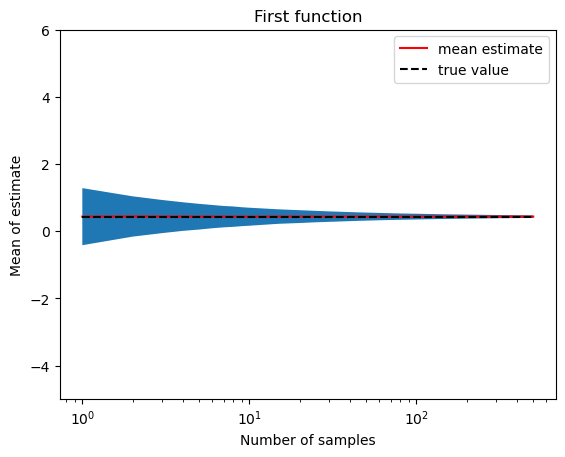

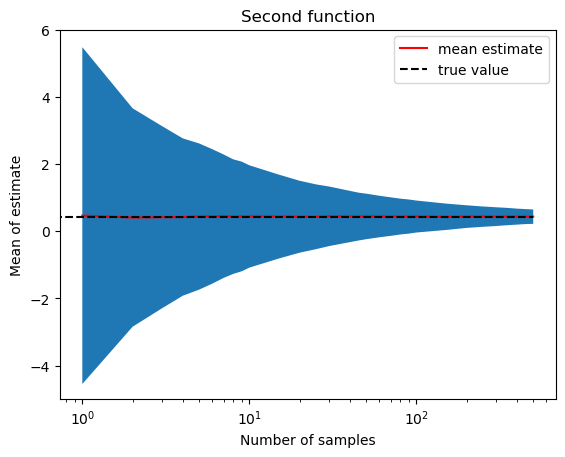

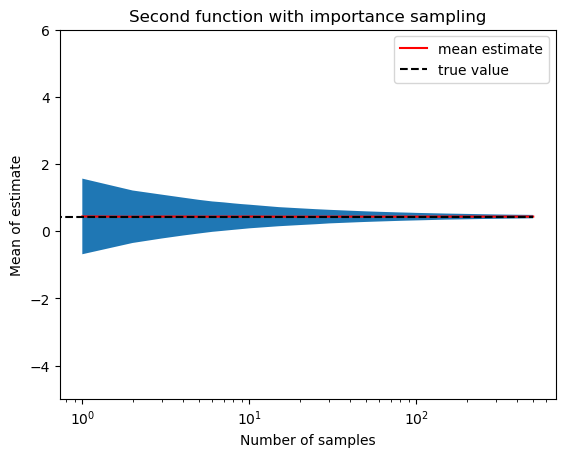

In [17]:
fig,ax1 = plt.subplots()
ax1.semilogx(n_sample_all, mean_all,'r-',label='mean estimate')
ax1.fill_between(n_sample_all, mean_all-2*np.sqrt(variance_all), mean_all+2*np.sqrt(variance_all))
ax1.set_xlabel("Number of samples")
ax1.set_ylabel("Mean of estimate")
ax1.plot([1,500],[0.43160702267383166,0.43160702267383166],'k--',label='true value')
ax1.set_ylim(-5,6)
ax1.set_title("First function")
ax1.legend()

fig2,ax2 = plt.subplots()
ax2.semilogx(n_sample_all, mean_all2,'r-',label='mean estimate')
ax2.fill_between(n_sample_all, mean_all2-2*np.sqrt(variance_all2), mean_all2+2*np.sqrt(variance_all2))
ax2.set_xlabel("Number of samples")
ax2.set_ylabel("Mean of estimate")
ax2.plot([0,500],[0.43160428638892556,0.43160428638892556],'k--',label='true value')
ax2.set_ylim(-5,6)
ax2.set_title("Second function")
ax2.legend()
plt.show()

fig2,ax2 = plt.subplots()
ax2.semilogx(n_sample_all, mean_all2b,'r-',label='mean estimate')
ax2.fill_between(n_sample_all, mean_all2b-2*np.sqrt(variance_all2b), mean_all2b+2*np.sqrt(variance_all2b))
ax2.set_xlabel("Number of samples")
ax2.set_ylabel("Mean of estimate")
ax2.plot([0,500],[ 0.43163734204459125, 0.43163734204459125],'k--',label='true value')
ax2.set_ylim(-5,6)
ax2.set_title("Second function with importance sampling")
ax2.legend()
plt.show()

You can see that the importance sampling technique has reduced the amount of variance for any given number of samples.